<a href="https://colab.research.google.com/github/AviralTripathim22ma012/Markov-Model-for-stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_ori = pd.concat(map(pd.read_csv, ['/content/MAHINDCIE.NS.csv', '/content/AMBUJACEM.NS.csv','/content/ICICIBANK.NS.csv','/content/FINCABLES.NS.csv','/content/HDFCBANK.NS.csv','/content/IOC.NS.csv','/content/MUTHOOTFIN.NS.csv','/content/RELIANCE.NS.csv','/content/TATAMOTORS.NS.csv','/content/^NSEI.csv']), axis=1)

In [ ]:
df_ori

,Mahindra,AmbujaCem,icici,Fin_cables,Hdfc,iocl,MuthootFin,Reliance,TataMotorsS,Date,Nifty50
0,293.100006,568.450012,937.400024,559.400024,1600.250000,76.199997,1090.050049,2707.550049,433.250000,28-11-2022,18562.75000
1,287.000000,564.950012,946.750000,580.049988,1597.849976,75.300003,1087.050049,2712.199951,433.149994,29-11-2022,18618.05078
2,284.450012,570.750000,952.900024,552.599976,1608.449951,76.650002,1080.750000,2731.350098,439.399994,30-11-2022,18758.34961
3,287.649994,580.950012,940.200012,574.549988,1619.500000,76.199997,1111.349976,2723.300049,438.250000,01-12-2022,18812.50000
4,287.549988,577.950012,930.599976,564.099976,1607.099976,77.000000,1135.750000,2722.149902,435.399994,02-12-2022,18696.09961
...,...,...,...,...,...,...,...,...,...,...,...
59,393.899994,352.450012,852.099976,673.349976,1640.349976,79.550003,990.000000,2414.399902,443.000000,20-02-2023,17844.59961
60,390.799988,352.850006,854.200012,683.099976,1646.500000,79.199997,985.799988,2434.100098,436.500000,21-02-2023,17826.69922
61,386.649994,335.399994,839.250000,661.500000,1614.199951,77.300003,971.500000,2378.899902,429.450012,22-02-2023,17554.30078
62,387.549988,336.899994,839.750000,713.900024,1603.250000,77.199997,957.049988,2367.500000,433.200012,23-02-2023,17511.25000


In [ ]:
df=df_ori.drop('Date',axis=1)

In [ ]:
df=df.iloc[1:64]

In [ ]:
df

,Mahindra,AmbujaCem,icici,Fin_cables,Hdfc,iocl,MuthootFin,Reliance,TataMotorsS,Nifty50
1,287.000000,564.950012,946.750000,580.049988,1597.849976,75.300003,1087.050049,2712.199951,433.149994,18618.05078
2,284.450012,570.750000,952.900024,552.599976,1608.449951,76.650002,1080.750000,2731.350098,439.399994,18758.34961
3,287.649994,580.950012,940.200012,574.549988,1619.500000,76.199997,1111.349976,2723.300049,438.250000,18812.50000
4,287.549988,577.950012,930.599976,564.099976,1607.099976,77.000000,1135.750000,2722.149902,435.399994,18696.09961
5,289.399994,573.349976,933.599976,560.400024,1612.949951,77.050003,1142.099976,2682.449951,428.750000,18701.05078
...,...,...,...,...,...,...,...,...,...,...
59,393.899994,352.450012,852.099976,673.349976,1640.349976,79.550003,990.000000,2414.399902,443.000000,17844.59961
60,390.799988,352.850006,854.200012,683.099976,1646.500000,79.199997,985.799988,2434.100098,436.500000,17826.69922
61,386.649994,335.399994,839.250000,661.500000,1614.199951,77.300003,971.500000,2378.899902,429.450012,17554.30078
62,387.549988,336.899994,839.750000,713.900024,1603.250000,77.199997,957.049988,2367.500000,433.200012,17511.25000


In [ ]:
returns = df.pct_change().dropna().apply(lambda x:np.log(1+x)) # using log rate of return

In [ ]:
returns

,Mahindra,AmbujaCem,icici,Fin_cables,Hdfc,iocl,MuthootFin,Reliance,TataMotorsS,Nifty50
2,-0.008925,0.010214,0.006475,-0.048480,0.006612,0.017769,-0.005812,0.007036,0.014326,0.007507
3,0.011187,0.017713,-0.013417,0.038953,0.006847,-0.005888,0.027920,-0.002952,-0.002621,0.002883
4,-0.000348,-0.005177,-0.010263,-0.018356,-0.007686,0.010444,0.021718,-0.000422,-0.006524,-0.006207
5,0.006413,-0.007991,0.003219,-0.006581,0.003633,0.000649,0.005575,-0.014691,-0.015391,0.000265
6,0.011851,0.013254,-0.011798,0.003474,-0.001117,-0.016356,-0.023252,0.002885,-0.003856,-0.003122
...,...,...,...,...,...,...,...,...,...,...
59,0.006878,-0.002409,-0.012305,-0.011811,-0.009435,-0.012492,0.008878,-0.010629,0.007022,-0.005566
60,-0.007901,0.001134,0.002462,0.014376,0.003742,-0.004410,-0.004251,0.008126,-0.014781,-0.001004
61,-0.010676,-0.050719,-0.017657,-0.032131,-0.019812,-0.024282,-0.014612,-0.022939,-0.016283,-0.015398
62,0.002325,0.004462,0.000596,0.076233,-0.006807,-0.001295,-0.014986,-0.004804,0.008694,-0.002455


In [ ]:
cov=returns.cov()

In [ ]:
cov

,Mahindra,AmbujaCem,icici,Fin_cables,Hdfc,iocl,MuthootFin,Reliance,TataMotorsS,Nifty50
Mahindra,0.001060,0.000291,0.000048,0.000181,-6.617404e-05,0.000071,0.000071,0.000065,-3.498100e-05,0.000002
AmbujaCem,0.000291,0.001792,0.000185,0.000302,1.357496e-04,0.000228,0.000289,0.000194,-3.767136e-05,0.000158
icici,0.000048,0.000185,0.000129,0.000066,6.859672e-05,0.000034,0.000047,0.000064,-2.550769e-05,0.000056
Fin_cables,0.000181,0.000302,0.000066,0.000763,1.208939e-05,0.000061,0.000085,0.000107,7.371206e-05,0.000055
Hdfc,-0.000066,0.000136,0.000069,0.000012,1.162712e-04,0.000034,0.000017,0.000040,-7.931676e-07,0.000053
iocl,0.000071,0.000228,0.000034,0.000061,3.377315e-05,0.000164,0.000066,0.000053,4.735900e-05,0.000033
MuthootFin,0.000071,0.000289,0.000047,0.000085,1.715556e-05,0.000066,0.000179,0.000053,3.085071e-05,0.000043
Reliance,0.000065,0.000194,0.000064,0.000107,3.956235e-05,0.000053,0.000053,0.000127,2.640647e-05,0.000058
TataMotorsS,-0.000035,-0.000038,-0.000026,0.000074,-7.931676e-07,0.000047,0.000031,0.000026,3.045646e-04,0.000020
Nifty50,0.000002,0.000158,0.000056,0.000055,5.301468e-05,0.000033,0.000043,0.000058,1.961032e-05,0.000049


In [ ]:
ret =returns.sum()      # Total return is sum of all logarithmic daily returns

In [ ]:
ret

Mahindra       0.446649
AmbujaCem     -0.492468
icici         -0.119990
Fin_cables     0.217178
Hdfc          -0.005586
iocl           0.026860
MuthootFin    -0.118680
Reliance      -0.129106
TataMotorsS   -0.012545
Nifty50       -0.063887
dtype: float64

In [ ]:
p_ret = []           # Define an empty array for portfolio returns
p_vol = []           # Define an empty array for portfolio volatility
p_weights = []       # Define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 200000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns1 = np.dot(weights, ret)
    p_ret.append(returns1)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Volatility is WCW'
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(62)              # Since there are 62 trading days in the 3 month period
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}
portfolio  = pd.DataFrame(data)

In [ ]:
portfolio

,Returns,Volatility
0,0.006982,0.076968
1,-0.016443,0.071592
2,0.009829,0.081469
3,0.007593,0.080825
4,0.017266,0.077401
...,...,...
199995,-0.030976,0.093288
199996,-0.064637,0.071821
199997,-0.076272,0.102986
199998,-0.041270,0.101554


CAPM

In [ ]:
rf = 0.06   # risk free interest rate
optimal_risky_port = portfolio.iloc[((portfolio['Returns']-rf)/portfolio['Volatility']).idxmax()]
optimal_risky_port         # Finding the portfolio with the highest sharpe's ratio

Returns       0.182342
Volatility    0.118416
Name: 172155, dtype: float64

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

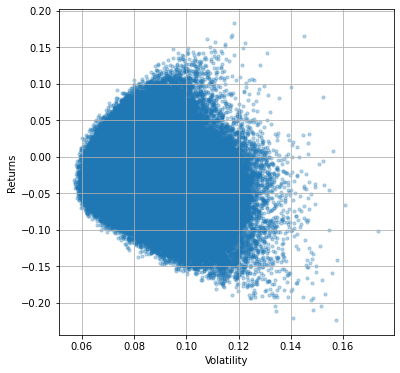

In [ ]:
portfolio.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,6])

In [ ]:
rf=0.06
em=0.168
sm=0.107
slope=(em-rf)/sm
intercept=rf
print(intercept)
print(slope)

0.06
1.0093457943925235


In [ ]:
x = np.linspace(0, .15, 100)
y = slope* x + intercept

Text(0, 0.5, 'Return')

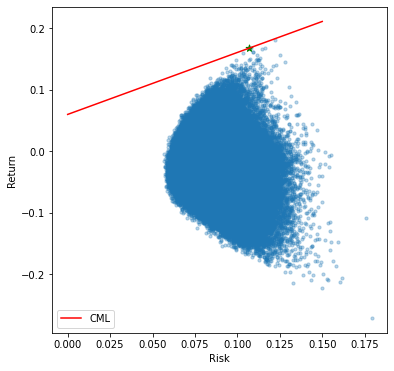

In [ ]:
plt.subplots(figsize=(6, 6))
plt.scatter(portfolio['Volatility'], portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(sm, em, color='g', marker='*', s=50)
plt.plot(x,y,color='red',linestyle='-',label=f'CML')
plt.legend(loc='lower left')
plt.xlabel("Risk")
plt.ylabel("Return")



SML

In [ ]:
ret

Mahindra       0.446649
AmbujaCem     -0.492468
icici         -0.119990
Fin_cables     0.217178
Hdfc          -0.005586
iocl           0.026860
MuthootFin    -0.118680
Reliance      -0.129106
TataMotorsS   -0.012545
Nifty50       -0.063887
dtype: float64

In [ ]:
sd=np.sqrt(returns.var())

In [ ]:
sd

Mahindra       0.032553
AmbujaCem      0.042327
icici          0.011347
Fin_cables     0.027625
Hdfc           0.010783
iocl           0.012788
MuthootFin     0.013381
Reliance       0.011264
TataMotorsS    0.017452
Nifty50        0.007002
dtype: float64

In [ ]:
assets = [0, 2, 6]  # Selected assets
er = ret[assets]  # Expected returns of selected assets
sd = sd[assets]  # Standard deviations of selected assets


In [ ]:
returns

,Mahindra,AmbujaCem,icici,Fin_cables,Hdfc,iocl,MuthootFin,Reliance,TataMotorsS,Nifty50
2,-0.008925,0.010214,0.006475,-0.048480,0.006612,0.017769,-0.005812,0.007036,0.014326,0.007507
3,0.011187,0.017713,-0.013417,0.038953,0.006847,-0.005888,0.027920,-0.002952,-0.002621,0.002883
4,-0.000348,-0.005177,-0.010263,-0.018356,-0.007686,0.010444,0.021718,-0.000422,-0.006524,-0.006207
5,0.006413,-0.007991,0.003219,-0.006581,0.003633,0.000649,0.005575,-0.014691,-0.015391,0.000265
6,0.011851,0.013254,-0.011798,0.003474,-0.001117,-0.016356,-0.023252,0.002885,-0.003856,-0.003122
...,...,...,...,...,...,...,...,...,...,...
59,0.006878,-0.002409,-0.012305,-0.011811,-0.009435,-0.012492,0.008878,-0.010629,0.007022,-0.005566
60,-0.007901,0.001134,0.002462,0.014376,0.003742,-0.004410,-0.004251,0.008126,-0.014781,-0.001004
61,-0.010676,-0.050719,-0.017657,-0.032131,-0.019812,-0.024282,-0.014612,-0.022939,-0.016283,-0.015398
62,0.002325,0.004462,0.000596,0.076233,-0.006807,-0.001295,-0.014986,-0.004804,0.008694,-0.002455


In [ ]:
returns1 = returns.iloc[: , [0, 2, 7]].copy()
returns2=returns.iloc[:,[1,3,4,5,6,8,9]].copy()

In [ ]:
ret2=returns2.sum()
cov2=returns2.cov()


In [ ]:
p_ret = []           # Define an empty array for portfolio returns
p_vol = []           # Define an empty array for portfolio volatility
p_weights = []       # Define an empty array for asset weights
num_assets = 7
num_portfolios = 200000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns11 = np.dot(weights, ret2)
    p_ret.append(returns11)
    var = cov2.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(62)
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}
portfolios  = pd.DataFrame(data)

In [ ]:
rf = 0.06
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.127580
Volatility    0.147731
Name: 93936, dtype: float64

In [ ]:
sd1=np.array(returns1.iloc[:,[0]].var())
sd2=np.array(returns1.iloc[:,[1]].var())
sd3=np.array(returns1.iloc[:,[2]].var())

In [ ]:
em1=np.array(returns1.iloc[:,[0]].sum())
em2=np.array(returns1.iloc[:,[1]].sum())
em3=np.array(returns1.iloc[:,[2]].sum())

In [ ]:
slopes1 = (em1 - rf) / sd1
intercepts1 = rf

slopes2 = (em2 - rf) / sd2
intercepts2 = rf

slopes3 = (em3 - rf) / sd1
intercepts3 = rf

In [ ]:
market_slope=(0.127 - rf) / 0.147
print(market_slope)

0.45578231292517013


In [ ]:
s_range = np.linspace(0, 0.005, 101)

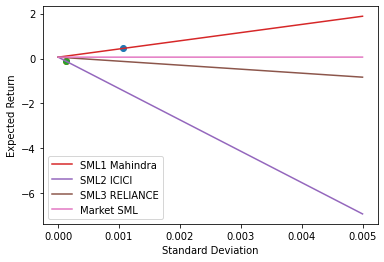

In [ ]:
fig, ax = plt.subplots()
ax.plot(sd1, em1, 'o')
ax.plot(sd2, em2, 'o')
ax.plot(sd3, em3, 'o')
ax.plot(s_range, (slopes1 * s_range + intercepts1), label=f'SML1 Mahindra')
ax.plot(s_range, (slopes2 * s_range + intercepts2), label=f'SML2 ICICI')
ax.plot(s_range, (slopes3 * s_range + intercepts3), label=f'SML3 RELIANCE')
ax.plot(s_range, (market_slope * s_range) + rf, label='Market SML')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.legend()
plt.show()